## Análisis Preliminar de Datos

A continuación se analizan los datos, previo a etapas que involucran técnicas de predicción.

Primeramente se importan las librerias necesarias:

In [40]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) # para ver todas las columnas

Luego se lee el archivo **.csv** con los datos enteros:

In [22]:
stars = pd.read_csv("stellar.csv")

Se muestran los primeros 5 valores:

In [3]:
stars.head()

,Seq,SIMBAD_ID,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2,cutoff,class,type,pla,catalog,e_M,e_R,e_Teff,e_L,mode
0,1,47_Tuc-V69 A,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN,3.897169,MS,G,NaN,eker14,0.570776,0.379939,2.523129,11.179804,EB
1,2,47_Tuc-V69 B,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN,3.887992,MS,G,NaN,eker14,0.698487,0.515907,2.517201,11.169170,EB
2,3,AD_Boo A,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN,3.484204,MS,F,NaN,eker14,0.636492,0.867410,1.825095,8.137143,EB
3,4,AD_Boo B,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN,3.766069,MS,F,NaN,eker14,0.496278,0.821018,1.952807,8.627038,EB
4,5,AG_Ari A,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN,1.042466,MS,B,NaN,eker14,3.234750,1.030466,2.427184,10.917577,EB


Se escogen los valores de las columnas relevantes y se ajusta el dataframe (estructura de dato usada en *PANDAS*):

In [4]:
cols = ['M','eM1','eM2','R','eR1','eR2','Teff','eTeff1', 'eTeff2','L','eL1','eL2','Meta','eMeta1', 'eMeta2', 'logg', 'elogg1', 'elogg2', 'rho', 'erho1', 'erho2']

In [5]:
stars = stars[cols]

In [17]:
stars.head()

,M,eM1,eM2,R,eR1,eR2,Teff,eTeff1,eTeff2,L,eL1,eL2,Meta,eMeta1,eMeta2,logg,elogg1,elogg2,rho,erho1,erho2
0,0.876,0.005,0.005,1.316,0.005,0.005,5945,150,150,1.941,0.217,0.217,-0.71,0.10,0.10,4.143,0.003,0.003,NaN,NaN,NaN
1,0.859,0.006,0.006,1.163,0.006,0.006,5959,150,150,1.531,0.171,0.171,-0.71,0.10,0.10,4.242,0.003,0.003,NaN,NaN,NaN
2,1.414,0.009,0.009,1.614,0.014,0.014,6575,120,120,4.375,0.356,0.356,0.10,0.15,0.15,4.173,0.008,0.008,NaN,NaN,NaN
3,1.209,0.006,0.006,1.218,0.010,0.010,6145,120,120,1.901,0.164,0.164,0.10,0.15,0.15,4.351,0.007,0.007,NaN,NaN,NaN
4,2.164,0.070,0.070,2.232,0.023,0.023,10300,250,250,50.350,5.497,5.497,NaN,NaN,NaN,4.075,0.023,0.023,NaN,NaN,NaN


In [25]:
stars.shape

(934, 21)

Se cuentan los valores NaN, se indica en que columna se encuentran, finalmente se genera una curva para vizualización:

In [18]:
nulls = stars.isnull().sum(axis = 0)

In [19]:
nulls

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L          17
eL1        17
eL2        17
Meta      216
eMeta1    216
eMeta2    216
logg       94
elogg1     94
elogg2     94
rho       304
erho1     304
erho2     304
dtype: int64

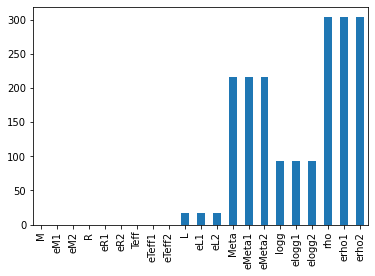

In [13]:
nulls.plot(kind='bar')

In [37]:
print('El porcentaje de NaNs en L es:', round(17*100/934,2), '%')
print('El porcentaje de NaNs en Meta es:', round(216*100/934,2), '%')
print('El porcentaje de NaNs en logg es:', round(94*100/934,2), '%')
print('El porcentaje de NaNs en rho es:', round(304*100/934,2), '%')

El porcentaje de NaNs en L es: 1.82 %
El porcentaje de NaNs en Meta es: 23.13 %
El porcentaje de NaNs en logg es: 10.06 %
El porcentaje de NaNs en rho es: 32.55 %


Se cuentan los valores NEGATIVOS, se indica en que columna se encuentran, finalmente se genera una curva para vizualización:

In [22]:
negs = stars.where(stars < 0).count()

In [26]:
negs

M           0
eM1         0
eM2         0
R           0
eR1         0
eR2         0
Teff        0
eTeff1      0
eTeff2      0
L           0
eL1         0
eL2         0
Meta      403
eMeta1      0
eMeta2      0
logg        0
elogg1      0
elogg2      0
rho         0
erho1       0
erho2       0
dtype: int64

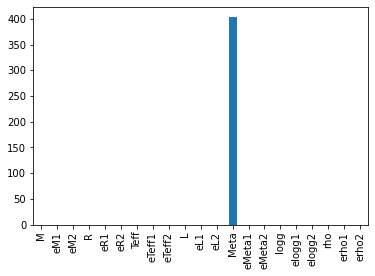

In [24]:
negs.plot(kind='bar')

In [1]:
print('El porcentaje de negativos en Meta es:', round(403*100/934,2), '%')

El porcentaje de negativos en Meta es: 43.15 %


In [2]:
# se promedian los errores en una sola columna


In [37]:
# se deben contar las que son class == MS 



In [39]:
# crear un dataframe con los datos que correspondes solo a la class == MS



Debemos hacer varias bases de datos, debido a que tenemos que asumir criterios par el manejo de los valores faltantes, sugiero 3 datasets, solo usando los class==MS:

- El primero (DS1) seria con solo los datos que no tengan valores faltantes, esto es hacer drop de cualquier dato que tenga en alguna de sus features un NaN. 
- El segundo (DS2) seria mantener los que tengan valores faltantes, y reemplazar los NaN con la media del feature correspondiente.
- El tercero (DS3), seria igual que el segundo, pero exluyendo el feature "rho".